In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_train = pd.read_csv(r'C:\Users\user\Downloads\AI comp\train.csv')
df_test = pd.read_csv(r'C:\Users\user\Downloads\AI comp\test.csv')
samp = pd.read_csv(r'C:\Users\user\Downloads\AI comp\SampleSubmission.csv')

In [3]:
df_train.head(10)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.0000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.0000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.2820,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.0000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.0000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no
5,Apcnt_1000020,3724.0,NaN,0.0000,0.0,0.0000,192944.0,9244585.0,6761209.0,67963357.0,...,0.030558,12.12,0.382960,NaN,0.0,lending,NaN,0.000000,NaN,no
6,Apcnt_1000024,3350.0,0.24205,0.3132,0.0,2.8188,NaN,580388.0,NaN,96472.0,...,0.660000,1.01,0.513504,NaN,0.0,charge,NaN,2.146512,0.004390,yes
7,Apcnt_1000028,3416.0,0.87020,0.0570,0.0,0.0000,17505.0,186331.0,186331.0,1484813.0,...,0.137500,3.03,0.635960,NaN,0.0,charge,155.295994,0.946074,0.128389,no
8,Apcnt_1000036,3376.0,0.29180,0.5586,0.0,0.0000,18283.0,1105149.0,18283.0,115533.0,...,0.471427,4.04,0.410880,0.0,0.0,charge,NaN,0.641601,0.009990,no
9,Apcnt_1000040,3310.0,0.24395,0.1562,0.0,0.0000,NaN,0.0,NaN,NaN,...,0.825000,1.01,0.800000,NaN,NaN,charge,NaN,0.000000,NaN,yes


In [4]:
df_test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [5]:
samp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Applicant_ID    24000 non-null  object
 1   default_status  24000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 375.1+ KB


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [7]:
from pycaret.classification import *

In [13]:
clf1 = setup(data = df_train, 
             target = 'default_status',
             numeric_imputation = 'mean',
             categorical_features = ['form_field47'], 
             ignore_features = ['Applicant_ID'],
             silent = True,normalize_method='minmax',normalize=True,remove_outliers=True,polynomial_features=True,polynomial_degree=3,feature_selection=True,feature_interaction=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2249
1,Target Type,Binary
2,Label Encoded,"no: 0, yes: 1"
3,Original Data,"(56000, 52)"
4,Missing Values,True
5,Numeric Features,41
6,Categorical Features,10
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.809000,0.831400,0.430300,0.660100,0.520900,0.408200
1,Extreme Gradient Boosting,0.807600,0.830100,0.406600,0.666300,0.504800,0.394100
2,Gradient Boosting Classifier,0.807200,0.829700,0.415700,0.659300,0.509800,0.397500
3,Light Gradient Boosting Machine,0.806500,0.829700,0.427300,0.651000,0.515800,0.401400
4,Extra Trees Classifier,0.802100,0.819500,0.393700,0.648500,0.489700,0.376000
5,Ada Boost Classifier,0.801900,0.821800,0.415100,0.637600,0.502700,0.385900
6,Linear Discriminant Analysis,0.800800,0.821400,0.421600,0.630600,0.505100,0.386600
7,Ridge Classifier,0.800300,0.000000,0.357500,0.659100,0.463300,0.353700
8,Logistic Regression,0.799900,0.820700,0.381800,0.644100,0.479000,0.365200
9,SVM - Linear Kernel,0.797800,0.000000,0.322900,0.672700,0.431100,0.327700


In [11]:
cat = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8185,0.8392,0.4415,0.6935,0.5395,0.4333
1,0.8150,0.8391,0.4381,0.6799,0.5329,0.4242
2,0.7983,0.8170,0.4091,0.6241,0.4943,0.3751
3,0.8050,0.8423,0.4348,0.6404,0.5179,0.4013
4,0.8067,0.8291,0.4297,0.6481,0.5168,0.4021
5,0.8115,0.8482,0.4241,0.6714,0.5198,0.4099
6,0.8115,0.8373,0.4520,0.6575,0.5357,0.4225
7,0.8045,0.8259,0.4275,0.6405,0.5127,0.3965
8,0.8029,0.8250,0.4308,0.6328,0.5126,0.3946
9,0.8055,0.8301,0.4208,0.6478,0.5101,0.3956


In [70]:
egb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8104,0.8295,0.3940,0.6841,0.5000,0.3933
1,0.8171,0.8421,0.4259,0.6971,0.5287,0.4234
2,0.8088,0.8358,0.3969,0.6755,0.5000,0.3915
3,0.8037,0.8286,0.4013,0.6498,0.4962,0.3827
4,0.8067,0.8260,0.3958,0.6660,0.4965,0.3863
5,0.8182,0.8450,0.4326,0.6978,0.5341,0.4288
6,0.8102,0.8358,0.4326,0.6621,0.5233,0.4112
7,0.8042,0.8338,0.4025,0.6516,0.4976,0.3844
8,0.8064,0.8268,0.3991,0.6630,0.4983,0.3874
9,0.7921,0.8115,0.3862,0.6070,0.4720,0.3505


In [17]:
tuned_egb = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8003,0.8160,0.4196,0.6409,0.5072,0.3887
1,0.7974,0.8196,0.4137,0.6318,0.5000,0.3798
2,0.7985,0.8185,0.4271,0.6308,0.5093,0.3884
3,0.8112,0.8391,0.4405,0.6758,0.5333,0.4215
4,0.8061,0.8327,0.4226,0.6636,0.5164,0.4025
5,0.7985,0.8128,0.3884,0.6476,0.4856,0.3699
6,0.8094,0.8301,0.4598,0.6588,0.5416,0.4261
7,0.8014,0.8332,0.4018,0.6538,0.4977,0.3826
8,0.8017,0.8301,0.4375,0.6391,0.5194,0.4000
9,0.8090,0.8358,0.4449,0.6644,0.5330,0.4188


In [15]:
tuned_cat = tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8088,0.8342,0.4254,0.6609,0.5176,0.4053
1,0.8034,0.8224,0.4087,0.6461,0.5007,0.3859
2,0.8171,0.8365,0.4354,0.6920,0.5345,0.4280
3,0.8083,0.8259,0.3987,0.6729,0.5007,0.3915
4,0.8077,0.8374,0.3893,0.6770,0.4944,0.3861
5,0.8110,0.8422,0.4071,0.6816,0.5097,0.4017
6,0.8085,0.8321,0.4016,0.6735,0.5031,0.3938
7,0.8053,0.8259,0.3949,0.6623,0.4948,0.3836
8,0.8056,0.8154,0.3893,0.6667,0.4916,0.3815
9,0.8055,0.8335,0.3864,0.6673,0.4894,0.3797


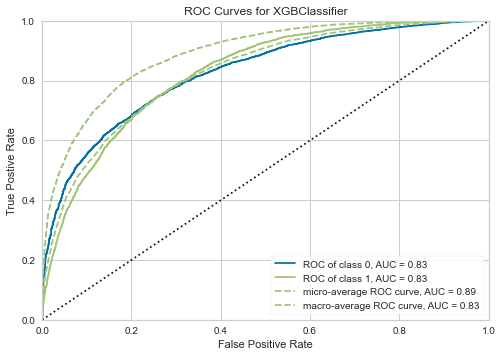

In [61]:
plot_model(estimator = egb, plot = 'auc')

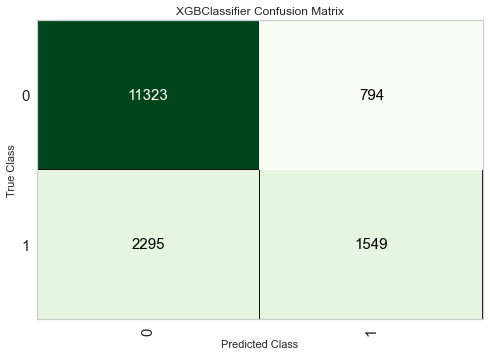

In [75]:
plot_model(estimator = egb, plot = 'confusion_matrix')

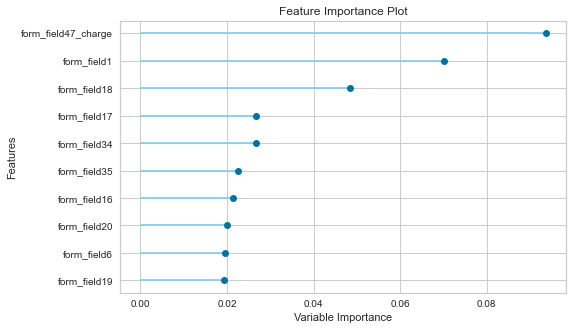

In [22]:
plot_model(estimator = tuned_egb, plot = 'feature')

In [23]:
evaluate_model(tuned_egb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
interpret_model(tuned_egb)

In [28]:
predictions = predict_model(tuned_egb, data=df_test)

In [72]:
probs = predict_model(tuned_cat, data=df_test)

In [32]:
pred = predict_model(egb, data=df_test)

In [73]:
samp['default_status'] = probs['Score']
samp.to_csv('submission7.csv',index=False)
samp.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.3794
1,Apcnt_1000048,0.4626
2,Apcnt_1000052,0.3287
3,Apcnt_1000076,0.7578
4,Apcnt_1000080,0.1656
